# Algoritmo Genético aplicado à seleção de características

### Descrição do problema
A cerveja é a terceira bebida mais consumida no mundo, ocupando um lugar de destaque na economia global. Devido a sua importância e a crescente exigência por parte de seus consumidores, o desenvolvimento de métodos instrumentais para garantir a qualidade do produto torna-se imprescindível. Em Cardoso et al., os autores construiram um modelo preditivo a partir de Partial Least Square Discriminant Analysis (PLS-DA) para classificar as amostras de acordo com a marca e o tipo da cerveja.

A leitura do artigo citado é um importante ponto de partida para a compreensão do problema.

### Objetivo
Seu objetivo nesta competição é contruir um modelo preditivo que seja capaz de determinar a marca da cerveja associada.

**Referências**

Cardoso, V. G. K., Sabin, G. P., & Hantao, L. W. (2022). Rapid evaporative ionization mass spectrometry (REIMS) combined with chemometrics for real-time beer analysis. Analytical Methods, 14(15), 1540-1546.re.

### Composição do Dataset

São dois arquivos disponibilizados: *train.csv* e *test.csv*.

O *train.csv* é composto por 195002 colunas e 201 amostras. A primeira coluna (beer_id) identifica a amostra, enquanto a última (target) indica a marca da cerveja.

O objetivo é um modelo que maximize a acurácia da classificação utilizando a menor quantidade de características possível.

Para testar a qualidade do modelo desenvolvido, você realizará a classificação utilizando o conjunto test.csv. Este conjunto possui 195001 colunas, 87 amostras.

### Implementação

In [1]:
!gdown 1-1wrpG1mW5mUjMIQmefr8Ad_yHmiEcYE
!gdown 1-AgteTEeHZU9q26yPhA3SVMMa86fGEIc
!gdown 1-DbGNIbWxzPtceHk_U3BHd19Qoh6dKWg

Downloading...
From: https://drive.google.com/uc?id=1-1wrpG1mW5mUjMIQmefr8Ad_yHmiEcYE
To: /content/train.csv
100% 162M/162M [00:00<00:00, 187MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-AgteTEeHZU9q26yPhA3SVMMa86fGEIc
To: /content/x_test.csv
100% 70.9M/70.9M [00:00<00:00, 97.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-DbGNIbWxzPtceHk_U3BHd19Qoh6dKWg
To: /content/y_test.csv
100% 664/664 [00:00<00:00, 2.86MB/s]


Importanto dados de treinamento

In [3]:
import pandas as pd

train = pd.read_csv('/content/train.csv')
train = train.set_index('beer_id')
train.head()

,0,1,2,3,4,5,6,7,8,9,...,194991,194992,194993,194994,194995,194996,194997,194998,194999,target
beer_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,1.0,2.0,8.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0
1,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0
3,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0


Importanto dados de teste

In [4]:
x_test = pd.read_csv('/content/x_test.csv')
x_test = x_test.rename(columns={'Unnamed: 0': 'beer_id'}).set_index('beer_id')
y_test = pd.read_csv('/content/y_test.csv')
x_test.head()

,0,1,2,3,4,5,6,7,8,9,...,194990,194991,194992,194993,194994,194995,194996,194997,194998,194999
beer_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,...,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,3.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0,2.0,11.0,3.0,2.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,5.0,3.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
x_test.head()

,0,1,2,3,4,5,6,7,8,9,...,194990,194991,194992,194993,194994,194995,194996,194997,194998,194999
beer_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,...,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,3.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0,2.0,11.0,3.0,2.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,5.0,3.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
y_test.head() # o cara botou um y_test['0'], sla o que era

,Unnamed: 0,0
0,0,25.0
1,1,30.0
2,2,10.0
3,3,25.0
4,4,32.0


In [15]:
y_test = y_test.drop(columns=['Unnamed: 0'])

In [16]:
y_test.head()

,0
0,25.0
1,30.0
2,10.0
3,25.0
4,32.0


### Modelo de classificação utilizando Partial Least Squares

In [7]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

def model_pls(x_train, y_train, x_test, y_test):
    # Create a PLS regression object with desired number of components
    n_components = 2
    pls = PLSRegression(n_components=n_components)

    # Train the PLS model
    pls.fit(x_train, y_train)

    # Apply the PLS model to make predictions
    y_pred = pls.predict(x_test)

    # Evaluate the model performance
    r2 = r2_score(y_test, y_pred)

    return r2

In [18]:
x_train = train.iloc[:, :-1]
y_train = train.iloc[:, -1]

In [17]:
y_train.head()

beer_id
0    25.0
1    28.0
2    32.0
3    24.0
4    29.0
Name: target, dtype: float64

**Resultado utilizando todas as variáveis**

In [19]:
r2 = model_pls(x_train, y_train, x_test, y_test)

print("R^2 score:", r2)

R^2 score: 0.6957098354975488


# Algoritmo Genético

### Classe indivíduo

Cada indivíduo é representado por um cromossomo de tamanho igual à quantidade de variáveis (ou características) existentes no dataframe original.
Cada indíviduo possui um fitness, que é representado pelo R^2 score.
O R^2 score de cada indivíduo é calculado utilizando apenas as características selecionadas, ou seja, apenas aquelas variáveis em que os genes são iguais a 1.

In [20]:
import random

class Individuo:
    def __init__(self, x_train, y_train, x_test, y_test):
        self.comprimento = x_train.shape[1]
        self.genotipo = self.gerar_genotipo()
        self.fitness = self.calcular_fitness(x_train, y_train, x_test, y_test)

    def gerar_genotipo(self):
        return [random.randint(0, 1) for _ in range(self.comprimento)]

    def calcular_fitness(self, x_train, y_train, x_test, y_test):
        ind_train = x_train.iloc[:, [i for i, val in enumerate(self.genotipo) if val == 1]]
        ind_test = x_test.iloc[:, [i for i, val in enumerate(self.genotipo) if val == 1]]
        r2_score = model_pls(ind_train, y_train, ind_test, y_test)
        return r2_score

    @staticmethod
    def maior_fitness(populacao):
        melhor_fitness = float('-inf')
        melhor_individuo = None

        for individuo in populacao:
            if individuo.fitness > melhor_fitness:
                melhor_fitness = individuo.fitness
                melhor_individuo = individuo

        return melhor_individuo

### Função para gerar a população inicial

In [21]:
def gerar_populacao_inicial(tamanho_populacao, x_train, y_train, x_test, y_test):
    populacao = []

    for _ in range(tamanho_populacao):
        individuo = Individuo(x_train, y_train, x_test, y_test)
        populacao.append(individuo)

    return populacao

### Seleção
Função para selecionar um indivíduo para a etapa de cruzamento. Esta seleção é realizada utilizando torneio entre dois indivíduos

In [46]:
def selecao(populacao):
    individuo1 = random.choice(populacao)
    individuo2 = random.choice(populacao)

    if individuo1.fitness > individuo2.fitness:
        return individuo1
    else:
        return individuo2

### Cruzamento
Função que realiza o cruzamento entre dois indivíduos. Nesta função é utilizado o cruzamento de 1-ponto

In [28]:
def cruzamento(individuo1, individuo2):
    ponto_corte = random.randint(1, individuo1.comprimento - 1)

    filho1 = Individuo(x_train, y_train, x_test, y_test)
    filho2 = Individuo(x_train, y_train, x_test, y_test)

    filho1.genotipo = individuo1.genotipo[:ponto_corte] + individuo2.genotipo[ponto_corte:]
    filho2.genotipo = individuo2.genotipo[:ponto_corte] + individuo1.genotipo[ponto_corte:]

    return filho1, filho2

### Algoritmo Genético

In [45]:
# Função de execução do algoritmo genético
def algoritmo_genetico(tamanho_populacao, num_geracoes, taxa_mutacao, x_train, y_train, x_test, y_test):
    # População inicial
    populacao = gerar_populacao_inicial(tamanho_populacao, x_train, y_train, x_test, y_test)
    melhores_fitness = []

    for gen in range(num_geracoes):
        print("Geração: {}".format(gen))
        melhores_fitness.append(Individuo.maior_fitness(populacao))

        nova_populacao = []

        while len(nova_populacao) < tamanho_populacao:
            pai1 = selecao(populacao)
            pai2 = selecao(populacao)

            filho1, filho2 = cruzamento(pai1, pai2)
            nova_populacao.append(filho1)
            if len(nova_populacao) < tamanho_populacao:
                nova_populacao.append(filho2)

        populacao = nova_populacao

    return melhores_fitness

### Função principal

In [30]:
x_train = train.iloc[:, :-1]
y_train = train.iloc[:, -1]

tamanho_populacao = 10
num_geracoes = 5
taxa_mutacao = 0

melhores_individuos = algoritmo_genetico(tamanho_populacao, num_geracoes, taxa_mutacao, x_train, y_train, x_test, y_test)

Geração: 0
Geração: 1
Geração: 2
Geração: 3
Geração: 4


In [31]:
for p in melhores_individuos:
    print("Quantidade de características selecionadas: {}. Fitness do indivíduo: {}".format(sum(p.genotipo), p.fitness))

Quantidade de características selecionadas: 97553. Fitness do indivíduo: 0.6988426502429491
Quantidade de características selecionadas: 97502. Fitness do indivíduo: 0.6974554151665207
Quantidade de características selecionadas: 97799. Fitness do indivíduo: 0.6973429557296793
Quantidade de características selecionadas: 97504. Fitness do indivíduo: 0.7000392799083306
Quantidade de características selecionadas: 97815. Fitness do indivíduo: 0.6990048902979603


In [32]:
melhores_individuos

### Atividade

Veja que a seleção de uma menor quantidade de características resultou em melhoria da métrica R^2. Mesmo por poucas gerações e utilizando uma população pequena, observa-se que a seleção de características específicas tendem a otimizar a classificação.



1. Execute o algoritmo novamente modificando a quantidade de gerações e o tamanho da população. Implemente uma função para visualizar graficamente a evolução do fitness do melhor indivíduo da população a cada geração.


In [53]:
tamanho_populacao = 5
num_geracoes = 4
taxa_mutacao = 0 # não está implementada ainda

melhores_individuos = algoritmo_genetico(tamanho_populacao=10,
                                          num_geracoes=4,
                                          taxa_mutacao=0,
                                          x_train=x_train,y_train=y_train,
                                          x_test=x_test, y_test=y_test)

Geração: 0
Geração: 1
Geração: 2
Geração: 3


In [38]:
import matplotlib.pyplot as plt

# Implemente uma função para visualizar graficamente a evolução do fitness do melhor indivíduo da população a cada geração.
def plot_the_best(melhores_individuos):
  lista_scores = [indiv.fitness for indiv in melhores_individuos]
  plt.plot(lista_scores, '-or')
  plt.title('Fitness dos melhores indivíduos ao longo das gerações')
  plt.ylabel("Fitness score")
  plt.xlabel("Geração")
  plt.show()

def print_the_best(melhores_individuos):
    for p in melhores_individuos:
        print("Quantidade de características selecionadas: {}. Fitness do indivíduo: {}".format(sum(p.genotipo), p.fitness))

In [54]:
print_the_best(melhores_individuos)

Quantidade de características selecionadas: 97619. Fitness do indivíduo: 0.7009404753492902
Quantidade de características selecionadas: 97742. Fitness do indivíduo: 0.699528674362603
Quantidade de características selecionadas: 98042. Fitness do indivíduo: 0.6971505919843506
Quantidade de características selecionadas: 97638. Fitness do indivíduo: 0.6996863311977705


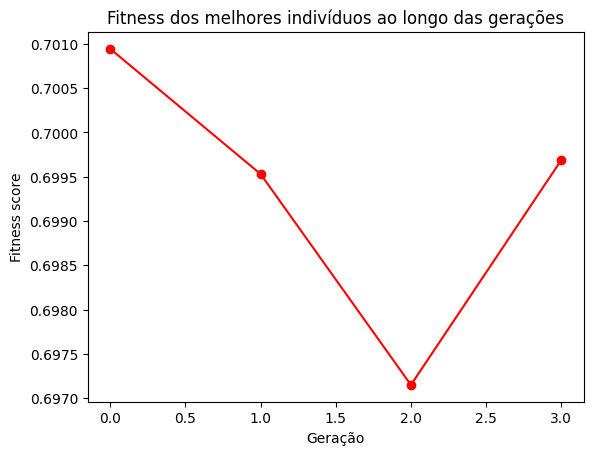

In [55]:
plot_the_best(melhores_individuos)


2. Altere a etapa de seleção da nova população. Faça com que os n melhores indivíduos sobrevivam para a próxima geração.



In [50]:
import math

def selecao2(populacao, n = 5):
    pop_ordenada = sorted(populacao, reverse=True, key=lambda individuo: individuo.fitness)
    the_best = pop_ordenada[:n]

    return the_best

def algoritmo_genetico2(tamanho_populacao, num_geracoes, taxa_mutacao,
                        x_train, y_train, x_test, y_test, survival_rate=0.9):
    # População inicial
    populacao = gerar_populacao_inicial(tamanho_populacao, x_train, y_train, x_test, y_test)
    melhores_fitness = []

    for gen in range(num_geracoes):
        print("Geração: {}".format(gen))
        melhores_fitness.append(Individuo.maior_fitness(populacao))
        nova_populacao = []

        # somente os melhores sobrevivem
        populacao = selecao2(populacao, n=math.floor(len(populacao)*survival_rate))

        while len(nova_populacao) < tamanho_populacao:
            pai1 = selecao(populacao)
            pai2 = selecao(populacao)

            filho1, filho2 = cruzamento(pai1, pai2)
            nova_populacao.append(filho1)
            if len(nova_populacao) < tamanho_populacao:
                nova_populacao.append(filho2)

        populacao = nova_populacao

    return melhores_fitness

In [68]:
melhores_individuos2 = algoritmo_genetico2(tamanho_populacao=10,
                                          num_geracoes=4,
                                          taxa_mutacao=0,
                                          x_train=x_train,y_train=y_train,
                                          x_test=x_test, y_test=y_test,
                                          survival_rate=0.9)

Geração: 0
Geração: 1
Geração: 2
Geração: 3


In [69]:
print_the_best(melhores_individuos2)

Quantidade de características selecionadas: 97588. Fitness do indivíduo: 0.6998376637009818
Quantidade de características selecionadas: 97516. Fitness do indivíduo: 0.6980649186141806
Quantidade de características selecionadas: 97655. Fitness do indivíduo: 0.6978086414911566
Quantidade de características selecionadas: 97773. Fitness do indivíduo: 0.6991500021550421


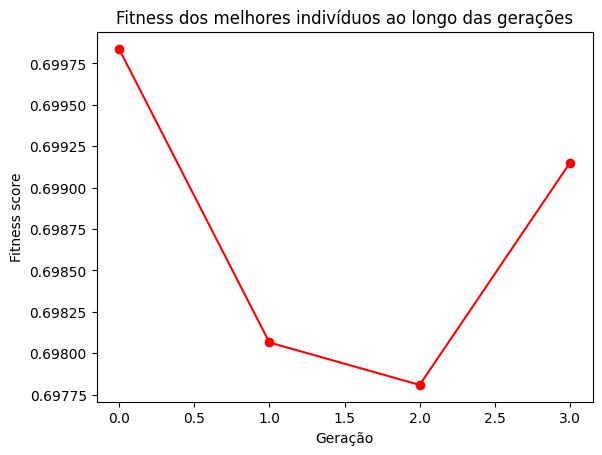

In [70]:
plot_the_best(melhores_individuos2)

3. Implemente a etapa de mutação

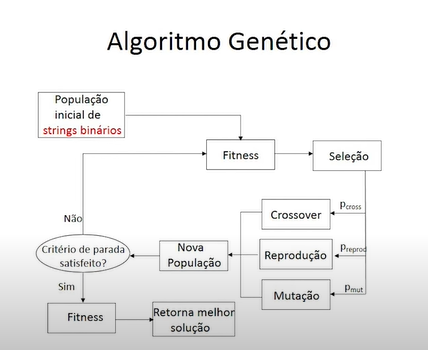

In [63]:
n = 5
gene = [random.choice([0, 1]) for _ in range(n)]

def mutacao(gene, taxa_mutacao=0.75):
  # % de chance de ocorrer mutacao em cada individuo
  if random.random() < taxa_mutacao:
    random_feature = random.randint(0, len(gene)-1)
    switch = lambda valor: 1 if valor == 0 else 0

    gene[random_feature] = switch(gene[random_feature])
  return gene


print(gene)
print(mutacao(gene))

[1, 1, 1, 0, 0]
[1, 1, 0, 0, 0]


In [66]:
def algoritmo_genetico3(tamanho_populacao, num_geracoes, taxa_mutacao,
                        x_train, y_train, x_test, y_test, survival_rate=0.5):
    # População inicial
    populacao = gerar_populacao_inicial(tamanho_populacao, x_train, y_train, x_test, y_test)
    melhores_fitness = []

    for gen in range(num_geracoes):
        print("Geração: {}".format(gen))
        melhores_fitness.append(Individuo.maior_fitness(populacao))

        nova_populacao = []

        # somente os melhores sobrevivem
        populacao = selecao2(populacao, n=math.floor(len(populacao)*survival_rate))

        while len(nova_populacao) < tamanho_populacao:
            pai1 = selecao(populacao)
            pai2 = selecao(populacao)

            filho1, filho2 = cruzamento(pai1, pai2)

            filho1.genotipo = mutacao(filho1.genotipo, taxa_mutacao)
            nova_populacao.append(filho1)

            if len(nova_populacao) < tamanho_populacao:
                filho2.genotipo = mutacao(filho2.genotipo, taxa_mutacao)
                nova_populacao.append(filho2)

        populacao = nova_populacao

    return melhores_fitness

In [74]:
melhores_individuos3 = algoritmo_genetico3(tamanho_populacao=50,
                                          num_geracoes=8,
                                          taxa_mutacao=0.15,
                                          x_train=x_train,y_train=y_train,
                                          x_test=x_test, y_test=y_test,
                                          survival_rate=0.3)

Geração: 0
Geração: 1
Geração: 2
Geração: 3
Geração: 4
Geração: 5
Geração: 6
Geração: 7


In [75]:
print_the_best(melhores_individuos3)

Quantidade de características selecionadas: 97681. Fitness do indivíduo: 0.7025641724660782
Quantidade de características selecionadas: 97433. Fitness do indivíduo: 0.7003383151243653
Quantidade de características selecionadas: 97580. Fitness do indivíduo: 0.7007793770387871
Quantidade de características selecionadas: 97600. Fitness do indivíduo: 0.703422539240858
Quantidade de características selecionadas: 97580. Fitness do indivíduo: 0.7018575470723922
Quantidade de características selecionadas: 97726. Fitness do indivíduo: 0.7008838282557246
Quantidade de características selecionadas: 97681. Fitness do indivíduo: 0.70263282828674
Quantidade de características selecionadas: 97718. Fitness do indivíduo: 0.7049457395080063


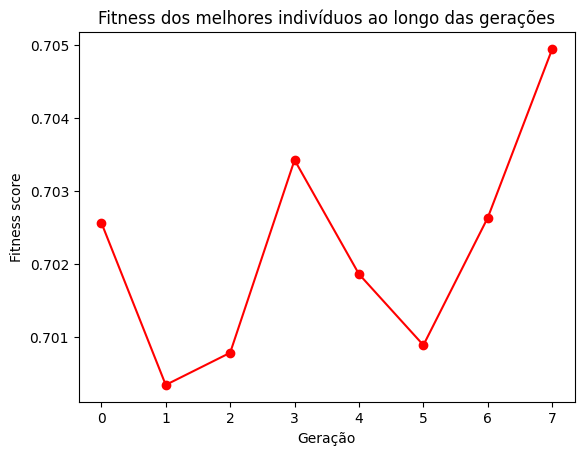

In [76]:
plot_the_best(melhores_individuos3)